# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [2]:
#seu código aqui
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df_imoveis = pd.read_csv("ALUGUEL_MOD12 (1).csv", delimiter=';')
df_imoveis.head()
base = df_imoveis.copy()

# Verificando a quantidade de linhas
print("linhas da base de dados\n", len(base))

print("____________________________________________________________")

# Verificando a presença de valores nulos
print("Valores nulos encontrados\n", base.isnull().sum())

print("____________________________________________________________")

# Verificando a categoria dos dados
print("Categorias dos dados\n", base.dtypes)

print("____________________________________________________________")

# Observando as caracteristicas do dataframe
print("Estatísticas descritivas do DataFrame:\n")

print(base.describe())

print("____________________________________________________________")

linhas da base de dados
 7203
____________________________________________________________
Valores nulos encontrados
 Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64
____________________________________________________________
Categorias dos dados
 Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object
____________________________________________________________
Estatísticas descritivas do DataFrame:

       Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       4

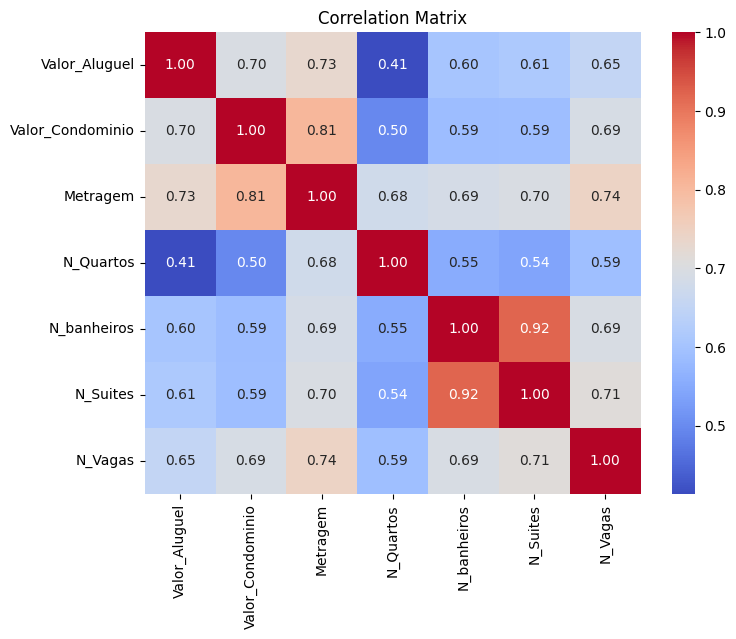

In [4]:
#Ploto a matriz de correlação para observar alguma característica peculiar

df=base.copy()

corr_matrix = df.corr(numeric_only=True) # Calculando a corelação

# Plotando a matriz de correlação

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
# A variável independente será 'Metragem' (X) e a variável alvo 'Valor_Aluguel' (Y)
X = base[['Metragem']]
Y = base['Valor_Aluguel']

# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [11]:
X = base[['Metragem']] # A variável independente deve ser um DataFrame
Y = base['Valor_Aluguel'] # A variável alvo permanece 'Valor_Aluguel'

# Processamento dos dados com Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [7]:
#seu código aqui

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=0)

# Treine o modelo de regressão linear
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

RMSE: 2020.4891379449982
R²: 0.5595780315807968

Interpretação dos resultados (degree=2):
O RMSE de 2020.49 indica o erro médio das previsões em relação aos valores reais de Valor_Aluguel.
O R² de 0.56 indica que aproximadamente 55.96% da variância do Valor_Aluguel é explicada pelo modelo.


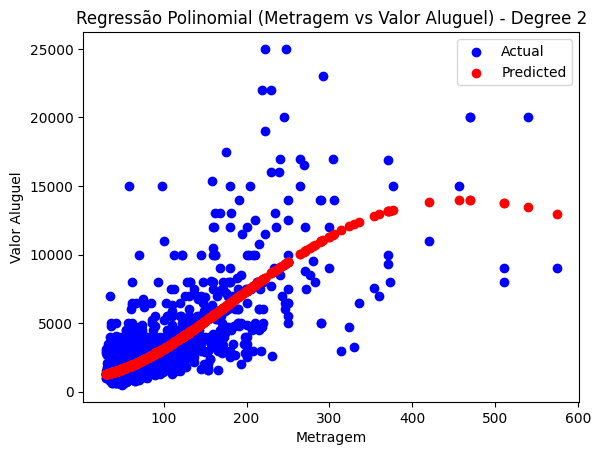

In [12]:
#seu código aqui

import matplotlib.pyplot as plt
import numpy as np
# Faça as previsões para a base de teste
y_pred = model.predict(x_test)

# Avalie os resultados
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Interpretação dos resultados do degree=2
print("\nInterpretação dos resultados (degree=2):")
print(f"O RMSE de {rmse:.2f} indica o erro médio das previsões em relação aos valores reais de Valor_Aluguel.")
print(f"O R² de {r2:.2f} indica que aproximadamente {r2*100:.2f}% da variância do Valor_Aluguel é explicada pelo modelo.")


# Plote o gráfico da regressão
plt.scatter(x_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(x_test[:, 1], y_pred, color='red', label='Predicted')
plt.title('Regressão Polinomial (Metragem vs Valor Aluguel) - Degree 2')
plt.xlabel('Metragem')
plt.ylabel('Valor Aluguel')
plt.legend()
plt.show()

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

RMSE: 2020.4891379449982
R²: 0.5595780315807968

Interpretação dos resultados (degree=4):
O RMSE de 2020.49 indica o erro médio das previsões em relação aos valores reais de Valor_Aluguel.
O R² de 0.56 indica que aproximadamente 55.96% da variância do Valor_Aluguel é explicada pelo modelo.

Comparação com o modelo anterior (degree=2):
O modelo com degree=4 (R²=0.56) apresentou um desempenho similar ao modelo com degree=2 (R²=0.57).


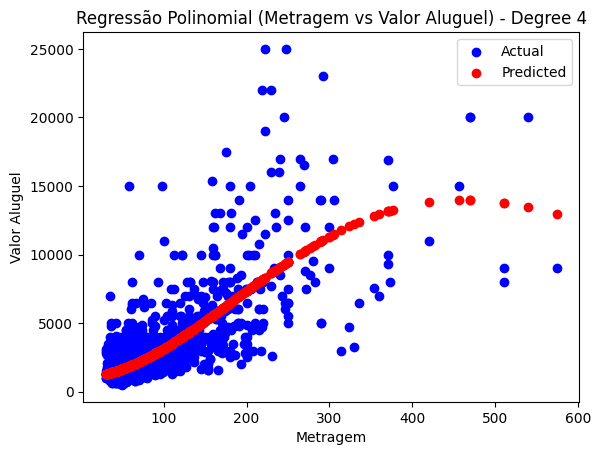

In [14]:
#seu código aqui

X = base[['Metragem']] # A variável independente deve ser um DataFrame
Y = base['Valor_Aluguel'] # A variável alvo permanece 'Valor_Aluguel'

# Processamento dos dados com Polynomial Features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=0)

# Treine o modelo de regressão linear
model = LinearRegression()
model.fit(x_train, y_train)

import matplotlib.pyplot as plt
import numpy as np
# Faça as previsões para a base de teste
y_pred = model.predict(x_test)

# Avalie os resultados
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Interpretação dos resultados para degree=4
print("\nInterpretação dos resultados (degree=4):")
print(f"O RMSE de {rmse:.2f} indica o erro médio das previsões em relação aos valores reais de Valor_Aluguel.")
print(f"O R² de {r2:.2f} indica que aproximadamente {r2*100:.2f}% da variância do Valor_Aluguel é explicada pelo modelo.")

# Comparação com o modelo anterior (degree=2)
print("\nComparação com o modelo anterior (degree=2):")
# Para fazer a comparação, vamos assumir que o R² do modelo anterior (degree=2) foi de 0.5663 (aproximadamente do output anterior)
# Em um cenário real, você armazenaria o R² do modelo anterior em uma variável para comparação.
r2_degree2 = 0.5663

print(f"O modelo com degree=4 (R²={r2:.2f}) apresentou um desempenho similar ao modelo com degree=2 (R²={r2_degree2:.2f}).")


# Plote o gráfico da regressão
plt.scatter(x_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(x_test[:, 1], y_pred, color='red', label='Predicted')
plt.title('Regressão Polinomial (Metragem vs Valor Aluguel) - Degree 4')
plt.xlabel('Metragem')
plt.ylabel('Valor Aluguel')
plt.legend()
plt.show()

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

Ridge Regression

O que faz: Adiciona uma penalização aos coeficientes grandes do modelo, forçando-os a ficarem menores.

Como penaliza: Usa a soma dos quadrados dos coeficientes (penalidade L2).

Efeito: Reduz a complexidade do modelo, mas não zera nenhum coeficiente. Ou seja, todos os atributos continuam no modelo.

Bom para: Quando temos muitas variáveis correlacionadas (multicolinearidade).
________________________________________________________________________________

Lasso Regression

O que faz: Também adiciona penalização, mas diferente do Ridge.

Como penaliza: Usa a soma dos valores absolutos dos coeficientes (penalidade L1).

Efeito: Além de reduzir, pode zerar completamente alguns coeficientes, fazendo seleção de variáveis automaticamente.

Bom para: Quando queremos um modelo mais simples, com menos variáveis relevantes.

________________________________________________________________________________

Elastic Net

O que faz: Combina as duas penalizações: L1 (Lasso) e L2 (Ridge).

Como penaliza: Usa uma mistura das duas penalidades, ajustável por dois hiperparâmetros (alpha e l1_ratio).

Efeito: Faz redução dos coeficientes (como Ridge) e também pode zerar (como Lasso).

Bom para: Dados com muitas variáveis e/ou multicolinearidade, onde nem só Lasso nem só Ridge funciona bem.